In [17]:
!pip install pillow
!pip install filetype




  Obtaining dependency information for filetype from https://files.pythonhosted.org/packages/18/79/1b8fa1bb3568781e84c9200f951c735f3f157429f44be0495da55894d620/filetype-1.2.0-py2.py3-none-any.whl.metadata


In [3]:
# Imports :

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io

In [4]:
# 1. # Load the image
from PIL import Image

#image = Image.open(r"C:\Users\email\Downloads\Image_Compression\lion.jpg")
#image = np.array(image)

#import os
#print(os.path.exists(r"C:\Users\email\Downloads\Image_Compression\lion.jpg"))


import filetype

kind = filetype.guess(r"C:\Users\email\Downloads\Image_Compression\lion.jpg")
if kind is None:
    print("❌ Cannot determine file type")
else:
    print(f"✅ Detected type: {kind.mime}, extension: {kind.extension}")





✅ Detected type: image/jpeg, extension: jpg


In [5]:
# Load the image
image = io.imread(r"C:\Users\email\Downloads\Image_Compression\lion.jpg")
rows, cols, ch = image.shape

In [6]:
# Reshape image into a 2D array of pixels
# We reshape because, K-Means expects a dataset of Samples x Features
# Here,
#       Each Sample = 1 Pixel, Each Feature = the R, G, B Values

pixels = image.reshape(-1, 3)

In [7]:
# Apply K-Means
k = 16  # number of colors to keep
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pixels)


KMeans(n_clusters=16, random_state=42)

In [8]:
# Replace pixels with their cluster centers
new_colors = kmeans.cluster_centers_[kmeans.labels_]
compressed_img = new_colors.reshape(rows, cols, ch).astype(np.uint8)

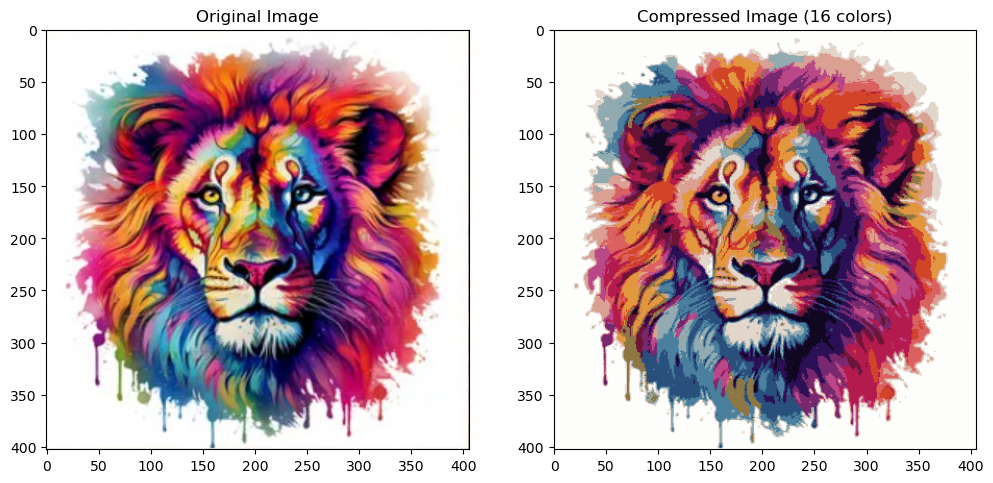

In [9]:
# Show original vs compressed
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title(f"Compressed Image ({k} colors)")
plt.imshow(compressed_img)

plt.show()

In [10]:
# Save compressed image in multiple formats
import os
output_dir = "outputs_k_means" # Name of the folder where the saved images will be stored
os.makedirs(output_dir, exist_ok=True)

# compressed_img is a NumPy array with shape (rows, cols, 3) and dtype uint8
# Image.fromarray(...) converts this into a Pillow Image object, which supports saving in many formats (PNG, JPEG, etc.).
# Pillow is the library that handles saving in multiple formats
output_img = Image.fromarray(compressed_img) 

# A list of file formats you want to save in.
# You can add/remove formats like "TIFF", "GIF", "AVIF" (if supported).
formats = ["PNG", "JPEG", "BMP", "WEBP"]  # add/remove formats here



In [11]:
# Loops through each format in the list.
# filename → builds the output file path using:
   # output_dir → saves inside outputs_k_means/
   # compressed_k{k} → includes the k value (e.g., compressed_k16.png).
   # {fmt.lower()} → extension matches the format (e.g., .png, .jpeg).

for fmt in formats:
    filename = os.path.join(output_dir, f"compressed_k{k}.{fmt.lower()}")

    try:
        output_img.save(filename, format=fmt)
        print(f"✅ Saved: {filename}")
    except ValueError:
        print(f"⚠️ Format {fmt} not supported by your Pillow version.")


✅ Saved: outputs_k_means\compressed_k16.png
✅ Saved: outputs_k_means\compressed_k16.jpeg
✅ Saved: outputs_k_means\compressed_k16.bmp
✅ Saved: outputs_k_means\compressed_k16.webp
